### 문제 정의
- 500명의 키와 몸무게, 비만도 라벨을 이용해 '비만을 판단하는 모델' 을 만들어보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 수집

In [159]:
bmi = pd.read_csv('bmi_500.csv', encoding='utf-8')
bmi.head() #데이터의 상위 5개의 데이터만 미리 볼 수 있음

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


### 데이터 전처리
- 이상치, 결측치 확인 후 제거 또는 변경하기

In [3]:
#결측치 여부를 확인할 수 있음
bmi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [4]:
# 기술통계 확인
# 이상치 확인
bmi.describe()
# count : 데이터의 개수
# mean : 평균
# std : 표준편차 (클수록 데이터 분포 넓음. 작을 수록 데이터 분포 좁음 : 평균으로부터 얼마나 떨어져있는가)
# min~max : 

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 탐색적 데이터 분석
- 데이터를 자세하게 살펴보자
- 그래프, 통계값등을 확인해보자

In [5]:
# 비만도 등급 확인
labelNm = bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [13]:
# 비만도 등급이 Obesity인 사람들만 살펴보기
# 1. bmi의 Label값 가져오기
# 2. Label 값 중 Obesity 찾기
bol = bmi['Label']=='Obesity'
# 3. boolean 데이터로 인덱싱하기
#bmi[bmi['Label']=='Obesity']
data1 = bmi.loc[bol]

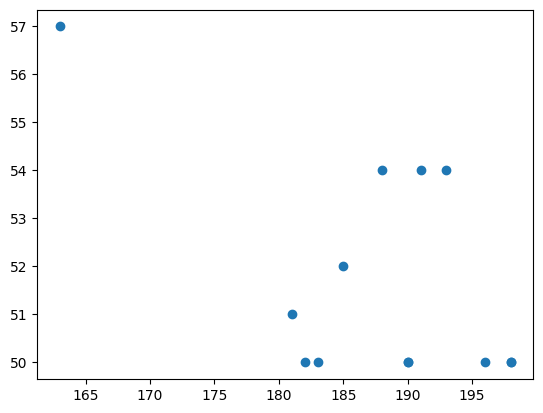

In [32]:
# Scatter차트 (산점도)를 사용해서 그래프로 표현
data1 = bmi[bmi['Label']=='Extremely Weak']
plt.scatter(data1['Height'],data1['Weight'])
plt.show()

In [36]:
# 함수로 만들기
def my_scatter(label, color):
    bol = bmi['Label'] == label
    data1 = bmi.loc[bol]
    plt.scatter(data1['Height'], data1['Weight'], c = color ,label = label )

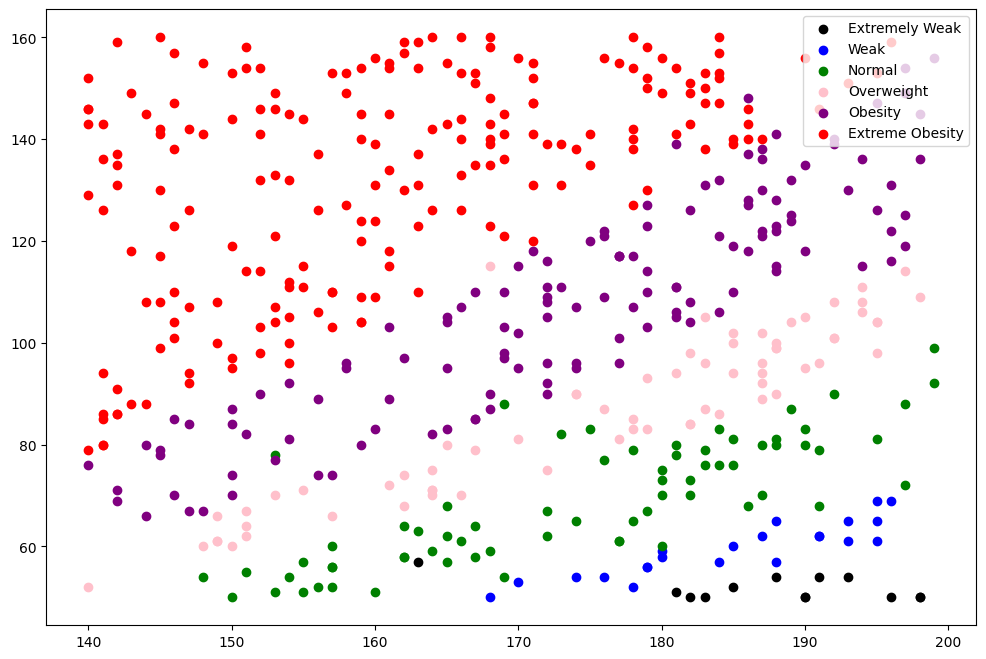

In [37]:
plt.figure(figsize= (12,8))
my_scatter('Extremely Weak','black')
my_scatter('Weak','blue')
my_scatter('Normal','green')
my_scatter('Overweight','pink')
my_scatter('Obesity','purple')
my_scatter('Extreme Obesity','red')
plt.legend()
plt.show()

In [160]:
# 키가 153cm에 몸무게가 78kg인 사람의 값 (Normal > Obesity)을 변경
# 데이터 꺼내오기 
bol = bmi['Label']=='Normal'
nor = bmi[bol]
bol1 = nor['Height']==153
nor[bol1]

,Gender,Height,Weight,Label
70,Female,153,51,Normal
231,Female,153,78,Normal


In [161]:
# 231번 인덱스 값의 라벨 변경
bmi.loc[231,'Label'] = 'Obesity'

In [162]:
bmi.loc[231,'Label'] 

'Obesity'

In [163]:
over = bmi[bmi['Label']=='Overweight']
over[over['Weight'] > 110].loc[149,'Label'] 
bmi.loc[149,'Label'] = 'Obesity'

In [164]:
nor1 = bmi[bmi['Label']=='Normal']
nor1[(bmi['Weight']>80) & (bmi['Height']<170)]
bmi.loc[296,'Label']= 'Obesity'

C:\Users\gjaischool1\AppData\Local\Temp\ipykernel_23320\3075407561.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nor1[(bmi['Weight']>80) & (bmi['Height']<170)]


In [165]:
bmi[(bmi['Label']=='Extremely Weak')&(bmi['Height']<170)]

bmi.loc[273]

Gender            Female
Height               163
Weight                57
Label     Extremely Weak
Name: 273, dtype: object

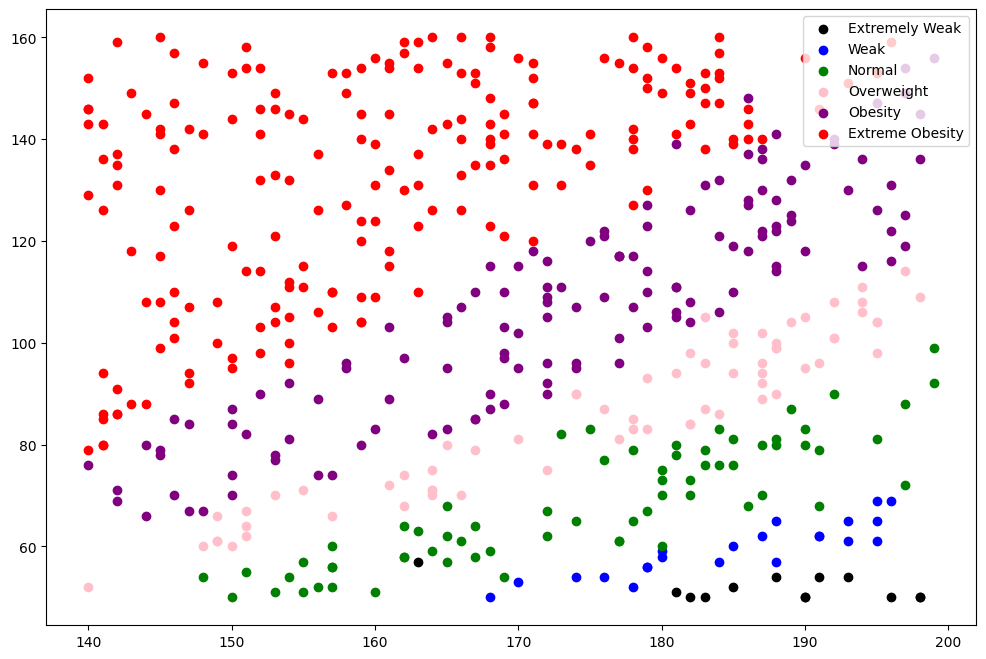

In [166]:
plt.figure(figsize= (12,8))
my_scatter('Extremely Weak','black')
my_scatter('Weak','blue')
my_scatter('Normal','green')
my_scatter('Overweight','pink')
my_scatter('Obesity','purple')
my_scatter('Extreme Obesity','red')
plt.legend()
plt.show()

# 5 모델 선택 및 하이퍼 파라미터 튜닝
- 데이터 분리
- 문제(X)와 답(y)로 데이터 분리
- 훈련(train)과 평가(test)로 데이터를 분리 - 7:3 or 75:25
    - 1. 규칙을 잘 찾아야 함 > 평가를 하는 의미가 있다 > 훈련의 비중이 큼 
    - 2. 훈련데이터의 비율을 수정할 수 있음
        - 데이터가 충분히 많은 경우 > 훈련의 비율을 낮춰도 괜찮음
        - 데이터가 부족할 경우 > 훈련의 비율을 높게 

In [123]:
# 문제와 정답으로 분리
# 문제 : 키, 몸무게
# 정답 : 비만도 레벨

X = bmi.loc[:,'Height':'Weight']
y = bmi.loc[:,'Label']

In [124]:
# 훈련과 평가로 분리
# 전체 : 500개 - 훈련 : 350개, 평가 : 150개
X = bmi.loc[:,'Height':'Weight']
y = bmi.loc[:,'Label']

X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
345            Obesity
346             Normal
347             Normal
348    Extreme Obesity
349             Normal
Name: Label, Length: 350, dtype: object

In [136]:
# 모델 불러오기
# 모델마다 규칙을 찾는 방법이 다르다
# 사용하는 모델마다 결과가 다르게 나옴
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### 학습
- 훈련데이터는 반드시 숫자 데이터여야 한다!

In [137]:
# train(훈련) : 학습 시 데이터와 평가 시 데이터를 구분짓기 위함
knn.fit(X_train,y_train)

KNeighborsClassifier()

### 평가 및 예측

In [138]:
# 평가 : 모델이 규칙을 얼마나 잘 찾았는가?
# X_test로 예측값을 확인
# 실제 정답인 y_test와 비교
# 전체데이터 중에서 맞춘 비율을 출력
knn.score(X_test,y_test)

0.9066666666666666

In [139]:
#train 데이터도 평가 가능, 일반적으로 train Data가 높게 나옴
#trin 데이터는 규칙을 찾을 때 사용한 데이터이기 때문에 평가 결과가 보통 test보다 높다
knn.score(X_train,y_train)

0.9371428571428572

In [140]:
# 예측
# X데이터와 같은 형식으로 
knn.predict([[193,60]])

C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Weak'], dtype=object)

In [142]:
#같은 데이터라도 모델에 따라서 결과값이 다르다.
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.86

In [167]:
# 성별 컬럼을 학습 데이터에 추가하기
# unique함수로 Gender 값 확인하기
# male = 0, Female = 1 로 바꾸기 > Mapping / Label encoding

bmi['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [168]:
bmi['Gender'] = bmi['Gender'].map({'Male': 0, 'Female':1})
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    int64 
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [169]:
bmi.head()

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight


In [170]:
# 데이터 나누기
X = bmi.loc[:,'Gender':'Weight']
y = bmi.loc[:,'Label']

X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [172]:
# 학습
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [173]:
#평가
knn.score(X_test,y_test)

# 'Gender'를 추가했는데, 값이 그대로인 이유 
# -> 성별은 비만도를 예측하는데 변인이 되지 않는다.(도움이 되지 않았다!!)

0.9066666666666666

In [176]:
#예측
knn.predict([[1,170,90]])

C:\Users\gjaischool1\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Obesity'], dtype=object)

In [ ]:
# knn 1
# train score : 0.9
# test score : 0.9

# knn 2
# train score : 0.95
# test score : 0.85
